Saving image.jpg to image.jpg


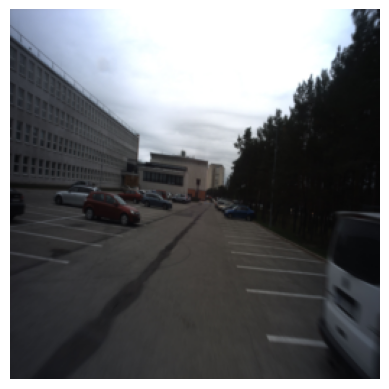

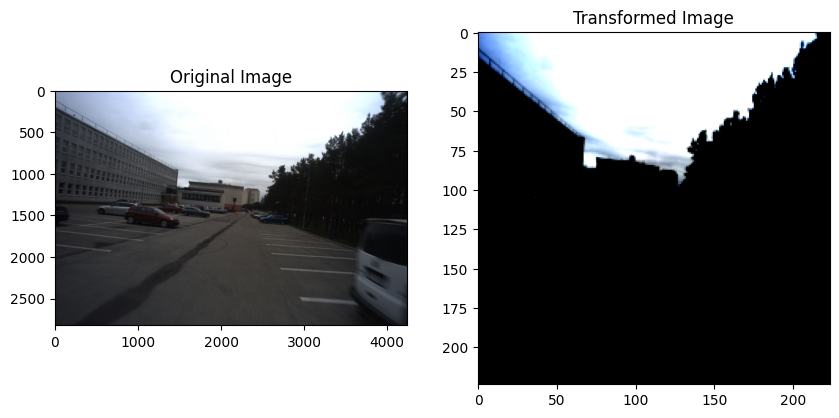

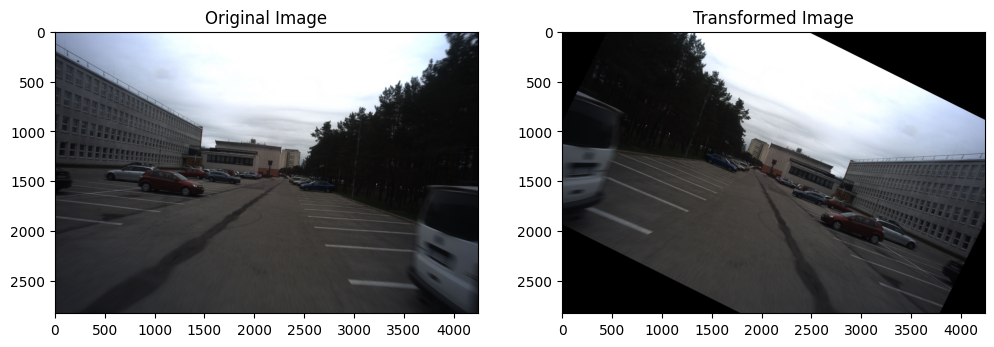

In [1]:
# Importing Required Libraries
import torch
from torchvision import transforms
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# 1. Upload and Resize an Image
uploaded = files.upload()  # Upload image file through Colab

# Open the uploaded image
image = Image.open('image.jpg')

# Resize the image to 256x256
resized_transform = transforms.Resize((256, 256))
resized_image = resized_transform(image)

# Display the resized image using Matplotlib
plt.imshow(resized_image)
plt.axis('off')  # Remove axes for better visualization
plt.title("Resized Image")
plt.show()

# 2. Composite Transformations: Resize, Random Crop, Normalize
# Define a series of transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),         # Resize to 256x256
    transforms.RandomCrop(224),           # Randomly crop to 224x224
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.3])  # Normalize with mean=0.5 and std=0.3
])

# Apply transformations to the image
transformed_image = transform(image)

# Visualize Original and Transformed Image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(transformed_image.permute(1, 2, 0))  # Rearrange dimensions for visualization
axes[1].set_title("Transformed Image")
axes[1].axis("off")
plt.show()

# 3. Custom Transformation: Random Horizontal Flip
class RandomHorizontalFlip(object):
    def __init__(self, p=0.5):
        self.p = p  # Probability of flipping

    def __call__(self, img):
        # Apply horizontal flip with probability p
        if torch.rand(1) < self.p:
            return transforms.functional.hflip(img)
        return img

# Composite Transformations with Random Flip and Rotation
composed_transform = transforms.Compose([
    RandomHorizontalFlip(p=0.5),  # Custom Horizontal Flip
    transforms.RandomRotation(30)  # Random rotation up to 30 degrees
])

# Apply composed transformations
transformed_img = composed_transform(image)

# Visualize Original and Transformed Images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(transformed_img)
axes[1].set_title("Transformed Image")
axes[1].axis("off")
plt.show()